In [5]:
from alfabeto_data import dissertation_images as di
from alfabeto_sources.all_sources import *
from alfabeto_data.pickled_data import *

In [9]:
di.k_means_data(alfabeto_notes_data[0], 2, di.label_maker_alfabeto(alfabeto_notes_data[1]), '/home/daniel/Desktop/tester.pdf')

n_digits: 2, 	 n_samples 529, 	 n_features 12
_______________________________________________________________________________
init        time     inertia  homo     compl   v-meas  ARI  AMI   silhouette
k-means++   0.61s    37374   0.313   0.869   0.460   0.329   0.310    0.528
   random   0.55s    37374   0.313   0.869   0.460   0.329   0.310    0.528
PCA-based   0.48s    37374   0.313   0.869   0.460   0.329   0.310    0.528
_______________________________________________________________________________


In [56]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

In [62]:
# centers = [[1, 1], [-1, -1], [1, -1]]
# X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
#                             random_state=0)

# ##############################################################################
# # Compute Affinity Propagation
# af = AffinityPropagation(preference=-50).fit(X)
# cluster_centers_indices = af.cluster_centers_indices_
# labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

# X = alfabeto_notes_data[0]
digits = np.array(alfabeto_notes_data[0])
    # data = scale(digits)
data = digits
X = data
label_dict = {}
label_numbers = []
n = 0
label_dict[alfabeto_notes_data[1][0]] = 0
for j in range(1, len(alfabeto_notes_data[1])):
    if alfabeto_notes_data[1][j] not in label_dict:
        label_dict[alfabeto_notes_data[1][j]] = n+1
        n += 1

for i in alfabeto_notes_data[1]:
    label_numbers.append(label_dict[i])
n_samples, n_features = data.shape
# n_digits = cluster_number
labels_true = np.array(label_numbers)
af = AffinityPropagation(max_iter=1000).fit(alfabeto_notes_data[0])
labels = af.labels_

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='euclidean'))

##############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

ValueError: S must be a square array (shape=(529, 12))

Cluster 1: Amazon, Yahoo, Apple
Cluster 2: Walgreen, CVS
Cluster 3: Novartis, Sanofi-Aventis, GlaxoSmithKline
Cluster 4: Colgate-Palmolive, Procter Gamble, Kimberly-Clark
Cluster 5: Time Warner, Comcast, Cablevision
Cluster 6: Dell, HP, Microsoft, IBM, 3M, Cisco, SAP, Texas instruments
Cluster 7: Kellogg, Coca Cola, Pepsi
Cluster 8: General Dynamics, Raytheon, Lookheed Martin, Northrop Grumman, Boeing
Cluster 9: Canon, Honda, Xerox, Caterpillar, Navistar, Mitsubishi, Unilever, Toyota, Sony, Marriott
Cluster 10: Mc Donalds, DuPont de Nemours, General Electrics, American express, Home Depot, Pfizer, Goldman Sachs, Wells Fargo, AIG, Ford, Ryder, JPMorgan Chase, Wal-Mart, Bank of America
Cluster 11: Kraft Foods
Cluster 12: Total, Exxon, ConocoPhillips, Valero Energy, Chevron


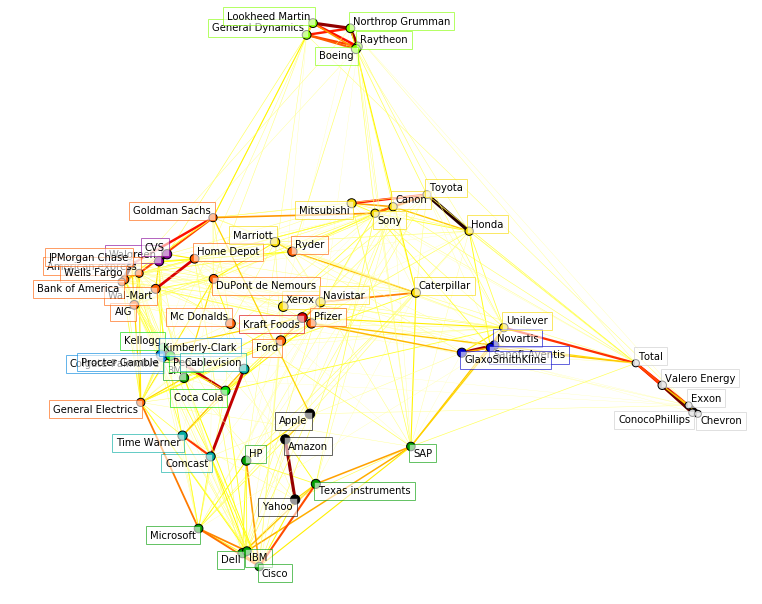

In [59]:
# Author: Gael Varoquaux gael.varoquaux@normalesup.org
# License: BSD 3 clause

import datetime

import numpy as np
import matplotlib.pyplot as plt
try:
    from matplotlib.finance import quotes_historical_yahoo
except ImportError:
    from matplotlib.finance import quotes_historical_yahoo_ochl as quotes_historical_yahoo
from matplotlib.collections import LineCollection

from sklearn import cluster, covariance, manifold

###############################################################################
# Retrieve the data from Internet

# Choose a time period reasonnably calm (not too long ago so that we get
# high-tech firms, and before the 2008 crash)
d1 = datetime.datetime(2003, 1, 1)
d2 = datetime.datetime(2008, 1, 1)

# kraft symbol has now changed from KFT to MDLZ in yahoo
symbol_dict = {
    'TOT': 'Total',
    'XOM': 'Exxon',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'VLO': 'Valero Energy',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'TWX': 'Time Warner',
    'CMCSA': 'Comcast',
    'CVC': 'Cablevision',
    'YHOO': 'Yahoo',
    'DELL': 'Dell',
    'HPQ': 'HP',
    'AMZN': 'Amazon',
    'TM': 'Toyota',
    'CAJ': 'Canon',
    'MTU': 'Mitsubishi',
    'SNE': 'Sony',
    'F': 'Ford',
    'HMC': 'Honda',
    'NAV': 'Navistar',
    'NOC': 'Northrop Grumman',
    'BA': 'Boeing',
    'KO': 'Coca Cola',
    'MMM': '3M',
    'MCD': 'Mc Donalds',
    'PEP': 'Pepsi',
    'MDLZ': 'Kraft Foods',
    'K': 'Kellogg',
    'UN': 'Unilever',
    'MAR': 'Marriott',
    'PG': 'Procter Gamble',
    'CL': 'Colgate-Palmolive',
    'GE': 'General Electrics',
    'WFC': 'Wells Fargo',
    'JPM': 'JPMorgan Chase',
    'AIG': 'AIG',
    'AXP': 'American express',
    'BAC': 'Bank of America',
    'GS': 'Goldman Sachs',
    'AAPL': 'Apple',
    'SAP': 'SAP',
    'CSCO': 'Cisco',
    'TXN': 'Texas instruments',
    'XRX': 'Xerox',
    'LMT': 'Lookheed Martin',
    'WMT': 'Wal-Mart',
    'WBA': 'Walgreen',
    'HD': 'Home Depot',
    'GSK': 'GlaxoSmithKline',
    'PFE': 'Pfizer',
    'SNY': 'Sanofi-Aventis',
    'NVS': 'Novartis',
    'KMB': 'Kimberly-Clark',
    'R': 'Ryder',
    'GD': 'General Dynamics',
    'RTN': 'Raytheon',
    'CVS': 'CVS',
    'CAT': 'Caterpillar',
    'DD': 'DuPont de Nemours'}

symbols, names = np.array(list(symbol_dict.items())).T

quotes = [quotes_historical_yahoo(symbol, d1, d2, asobject=True)
          for symbol in symbols]

open = np.array([q.open for q in quotes]).astype(np.float)
close = np.array([q.close for q in quotes]).astype(np.float)

# The daily variations of the quotes are what carry most information
variation = close - open

###############################################################################
# Learn a graphical structure from the correlations
edge_model = covariance.GraphLassoCV()

# standardize the time series: using correlations rather than covariance
# is more efficient for structure recovery
X = variation.copy().T
X /= X.std(axis=0)
edge_model.fit(X)

###############################################################################
# Cluster using affinity propagation

_, labels = cluster.affinity_propagation(edge_model.covariance_)
n_labels = labels.max()

for i in range(n_labels + 1):
    print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

###############################################################################
# Find a low-dimension embedding for visualization: find the best position of
# the nodes (the stocks) on a 2D plane

# We use a dense eigen_solver to achieve reproducibility (arpack is
# initiated with random vectors that we don't control). In addition, we
# use a large number of neighbors to capture the large-scale structure.
node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver='dense', n_neighbors=6)

embedding = node_position_model.fit_transform(X.T).T

###############################################################################
# Visualization
plt.figure(1, facecolor='w', figsize=(10, 8))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

# Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

# Plot the nodes using the coordinates of our embedding
plt.scatter(embedding[0], embedding[1], s=100 * d ** 2, c=labels,
            cmap=plt.cm.spectral)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
#a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[embedding[:, start], embedding[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(
        zip(names, labels, embedding.T)):

    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=10,
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=plt.cm.spectral(label / float(n_labels)),
                       alpha=.6))

plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
         embedding[0].max() + .10 * embedding[0].ptp(),)
plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
         embedding[1].max() + .03 * embedding[1].ptp())

plt.show()

In [63]:
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

In [64]:
labels_true

array([0, 1, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 2,
       2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 1,
       0, 1, 2, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 0,
       1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 0, 1, 0, 2,
       1, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1,
       0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1,
       2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1,
       0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2,
       2])

In [70]:
x = [1, 3, 2, 4]

In [66]:
np.std(x)

1.1180339887498949

In [71]:
np.sqrt(np.mean(abs(x - np.mean(x))**2))

1.1180339887498949

In [72]:
x - np.mean(x)

array([-1.5,  0.5, -0.5,  1.5])